# From Neurons to Networks: Exploring Deep Learning Algorithms

Roderick Perez, Ph.D.
OMV

---

In [49]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# ReLU activation function
def relu(x):
    return np.maximum(0, x)

In [51]:
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [52]:
# Mean Squared Error (MSE) and its derivative
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [53]:
def mse_derivative(y_true, y_pred):
    return -2 * (y_true - y_pred) / y_true.size

In [54]:
# Forward pass through the network
def forward_pass(inputs, weights, bias):
    z = np.dot(weights, inputs) + bias
    activated_output = relu(z)
    return z, activated_output

In [55]:
# Training process
def train(inputs, true_output, weights, bias, learning_rate, epochs):
    errors = []

    for epoch in range(epochs):
        # Forward pass
        z, hidden_output = forward_pass(inputs, weights, bias)

        # Calculate error
        error = mse(true_output, hidden_output)
        errors.append(error)

        # Backpropagation: Compute gradients
        error_gradient = mse_derivative(true_output, hidden_output)
        relu_grad = relu_derivative(z)
        gradient = error_gradient * relu_grad
        
        # Update weights and biases (Gradient Descent)
        weights_gradient = np.dot(gradient[:, np.newaxis], inputs[np.newaxis, :])
        weights -= learning_rate * weights_gradient
        bias -= learning_rate * gradient

        # Print progress
        print(f"Epoch {epoch+1}, Error: {error:.4f}")

    return weights, bias, errors

In [56]:
# Initialize the network parameters
inputs = np.array([2, 1, 3, 1])  # Input layer with 4 values
true_output = np.array([1, 0])   # True output we want (for training purposes)

In [61]:
# Initialize random weights and biases
input_size = inputs.shape[0]
weights = np.ones((2, input_size))  #np.random.randn(2, input_size) * np.sqrt(2 / input_size)
bias = np.zeros(2)       # Bias for 2 hidden nodes

In [62]:
# Set learning rate and number of iterations (epochs)
learning_rate = 0.01
epochs = 10

In [63]:
# Train the network
weights, bias, errors = train(inputs, true_output, weights, bias, learning_rate, epochs)

Epoch 1, Error: 42.5000
Epoch 2, Error: 29.9880
Epoch 3, Error: 21.1595
Epoch 4, Error: 14.9302
Epoch 5, Error: 10.5347
Epoch 6, Error: 7.4333
Epoch 7, Error: 5.2449
Epoch 8, Error: 3.7008
Epoch 9, Error: 2.6113
Epoch 10, Error: 1.8425


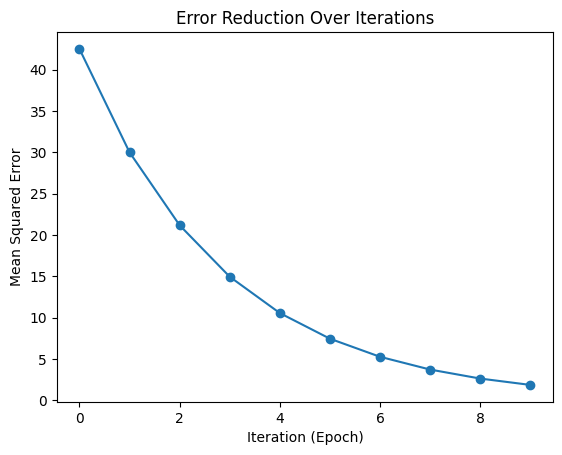

In [64]:
# Plot the error over iterations
plt.plot(range(epochs), errors, marker='o')
plt.xlabel("Iteration (Epoch)")
plt.ylabel("Mean Squared Error")
plt.title("Error Reduction Over Iterations")
plt.show()

---

## Make this changes:
* Change the learning rate
* Change the epochs
* Change the weights to:
    * Zeros
    * Ones
* Change the bias to:
    * Zeros
    * Ones